In [346]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v100
reload(pipeline_v100)

sns.set_palette("Set2")
# sns.color_palette("Set2")

In [404]:
x_s = np.linspace(0, 2.5, num=300)

n = 5
trace_out_index = np.floor(n / 2)
y_s = np.array([pipeline_v100.simulation(n=n, 
                                         a_x= 3, 
                                         h_z= x, 
                                         delta = 0.1,
                                         #m = 2**(n-1),
                                         trace_out_index = trace_out_index,
                                         derivative_delta = 1e-5,
                                         m = 4,
                                         DEBUG=True) for x in x_s])

# just for plotting clarity
sparse_indices = [i for i in list(range(len(x_s))) if i%10==0]

Fidelity F = (0.9960069688087018+1.0344342953928292e-05j)

Fidelity F = (0.9960294662189222-6.932713141206213e-06j)

Fidelity F = (0.9959692015461429-6.725833461728361e-05j)

Fidelity F = (0.9960049857260319-9.020338545652678e-06j)

Fidelity F = (0.9959718754217012-5.376701374875516e-05j)

Fidelity F = (0.9960686837648951-8.90370246903744e-06j)

Fidelity F = (0.9960744579590581-7.962972909194715e-06j)

Fidelity F = (0.9960363230932715-1.1059601788593357e-05j)

Fidelity F = (0.9960220012918434-2.7302980870931388e-06j)

Fidelity F = (0.9960412484646809+3.940125998642382e-06j)

Fidelity F = (0.9960237333005907-5.762566727093701e-06j)

Fidelity F = (0.996037501695602+7.986627084195288e-06j)

Fidelity F = (0.9959635425381661+0.00010451545420378047j)

Fidelity F = (0.9961125666818853+9.368225452292584e-07j)

Fidelity F = (0.9959791996963719-7.856490027148272e-05j)

Fidelity F = (0.9960969449075565-9.491599025180348e-06j)

Fidelity F = (0.9960811608594662-5.0208017971053456e-05j)

Fidelity F 

In [405]:
y_s[0]

{'fidelity_truncated': 0.9959182702822809,
 'fidelity_truncated_generalized': (0.9959182702822812+1.0487822271184329e-19j),
 'lower_tqfi': (3.2653837741750453-8.390257816947462e-17j),
 'upper_tqfi': 3.265383774175312,
 'fidelity_true': 0.9960069688087017268,
 'qfi_fidelity': 3.1944249530386179367,
 'sub_qfi_bound': 2.1535735164327714,
 'super_qfi_bound': 3.2653837741769105,
 'trace_rho': (1+0j),
 'trace_rho_delta': (0.9999999999999993-1.812473944148674e-18j),
 'purity_rho': (0.9609634896831227+0j),
 'purity_rho_delta': (0.9561517297936853-2.1682389088484983e-18j),
 'rank_rho': 2,
 'rank_rho_delta': 2,
 'QFI_from_SLD': 3.2763302240910623}

In [406]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])
qfi_fidelity = np.array([np.real(x["qfi_fidelity"]) for x in y_s ])
true_fidelity = np.array([np.real(x["fidelity_true"]) for x in y_s ])
fidelity_truncated = np.array([np.real(x["fidelity_truncated"]) for x in y_s ])
fidelity_generalized = np.array([np.real(x["fidelity_truncated_generalized"]) for x in y_s ])

sub_qfi_bound = np.array([np.real(x["sub_qfi_bound"]) for x in y_s ])
super_qfi_bound = np.array([np.real(x["super_qfi_bound"]) for x in y_s ])
qfi_from_sld = np.array([np.real(x["QFI_from_SLD"]) for x in y_s ])

error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

3.1279542204903005e-14


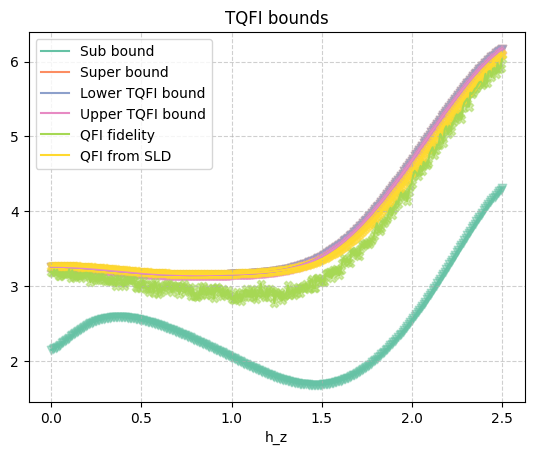

In [407]:
plt.scatter(x_s, sub_qfi_bound, marker="v", alpha=0.5)
plt.plot(x_s, sub_qfi_bound, label="Sub bound")
plt.scatter(x_s, super_qfi_bound, marker="v", alpha=0.5)
plt.plot(x_s, super_qfi_bound, label="Super bound")
plt.scatter(x_s, lower_tqfi, marker="v", alpha=0.5)
plt.plot(x_s, lower_tqfi, label="Lower TQFI bound")
plt.scatter(x_s, (upper_tqfi), marker="^", alpha=0.5)
plt.plot(x_s, (upper_tqfi), label="Upper TQFI bound")
plt.scatter(x_s, (qfi_fidelity), marker="X", alpha=0.5)
plt.plot(x_s, (qfi_fidelity), label="QFI fidelity")
plt.scatter(x_s, (qfi_from_sld), marker="X", alpha=0.5)
plt.plot(x_s, (qfi_from_sld), label="QFI from SLD")
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.legend()
plt.show()

In [408]:
print(f"max at h_z = {x_s[np.argmax(lower_tqfi)]}")

max at h_z = 2.5


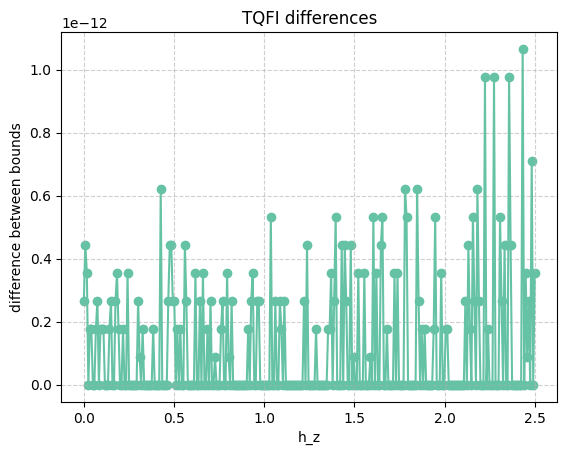

In [409]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

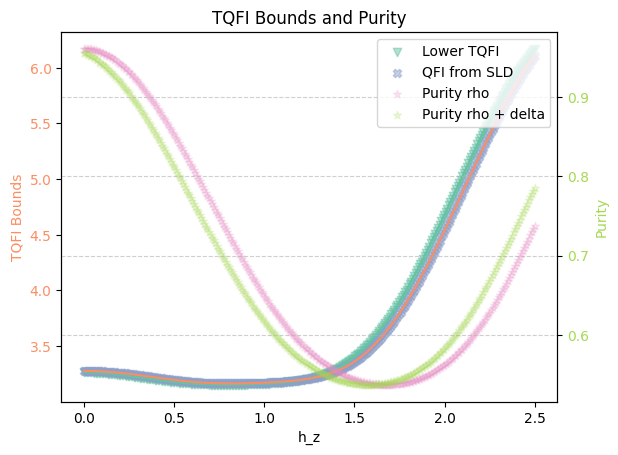

In [410]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")
# First y-axis

#ax1.scatter(x_s, super_qfi_bound, marker="^", alpha=0.5, label="Super QFI bound", color =  palette[0])
#ax1.plot(x_s, super_qfi_bound)
#ax1.scatter(x_s, upper_tqfi, marker="^", alpha=0.5, label="Upper TQFI", color =  palette[1])
#ax1.plot(x_s, upper_tqfi)



ax1.scatter(x_s, lower_tqfi, alpha=0.5, marker="v", label="Lower TQFI", color = palette[0])
ax1.plot(x_s, lower_tqfi)


ax1.scatter(x_s, qfi_from_sld, marker= "X", alpha=0.5, label="QFI from SLD", color = palette[2])
ax1.plot(x_s, qfi_from_sld)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[3])
ax2.scatter(x_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[4])

ax2.set_ylabel("Purity", color=palette[4])
ax2.tick_params(axis='y', labelcolor=palette[4])

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()


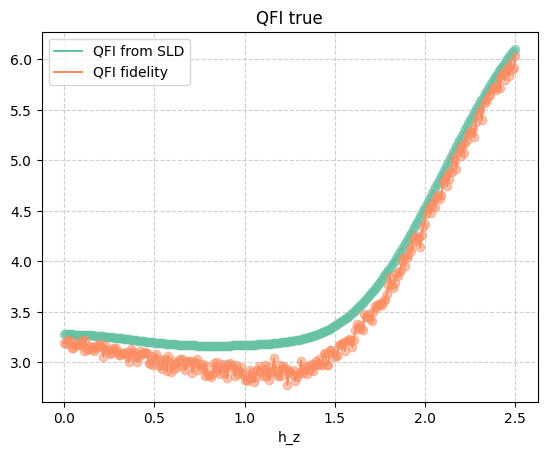

In [ ]:
plt.scatter(x_s,qfi_from_sld, alpha=0.5)
plt.plot(x_s,qfi_from_sld, label="QFI from SLD")
plt.scatter(x_s,qfi_fidelity, alpha=0.5)
plt.plot(x_s,qfi_fidelity, label="QFI fidelity")
plt.xlabel("h_z")
plt.title("QFI true")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability


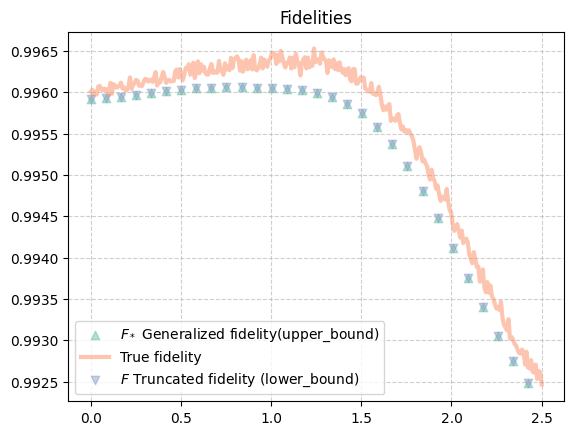

In [412]:
plt.scatter(x_s[sparse_indices], 
            fidelity_generalized[sparse_indices], 
            label="$F_*$ Generalized fidelity(upper_bound)", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(x_s, true_fidelity, label="True fidelity", alpha=0.5, linewidth=3, color=palette[1])

plt.scatter(x_s[sparse_indices], fidelity_truncated[sparse_indices],
             label="$F$ Truncated fidelity (lower_bound)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("Fidelities")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [413]:
all(true_fidelity <=  fidelity_generalized) & \
all(true_fidelity >= fidelity_truncated)

False

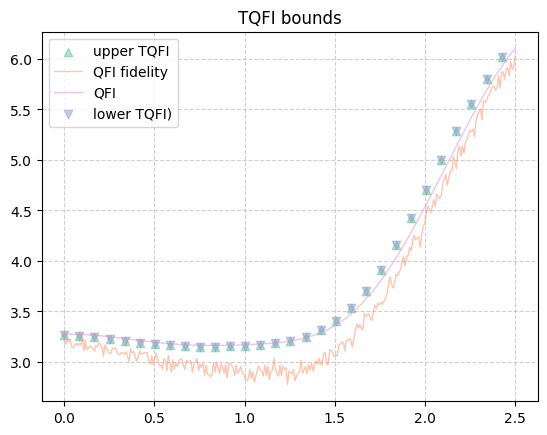

In [414]:
plt.scatter(x_s[sparse_indices], 
            upper_tqfi[sparse_indices], 
            label="upper TQFI", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[1])
plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[3])

plt.scatter(x_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [415]:
all(lower_tqfi <= qfi_from_sld) & \
all(qfi_from_sld <= upper_tqfi)

False

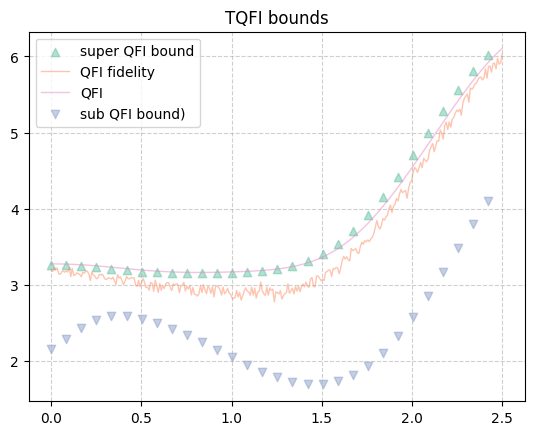

In [416]:
plt.scatter(x_s[sparse_indices], 
            super_qfi_bound[sparse_indices], 
            label="super QFI bound", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[1])
plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[3])

plt.scatter(x_s[sparse_indices], 
            sub_qfi_bound[sparse_indices],
             label="sub QFI bound)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [417]:
all(super_qfi_bound >= qfi_from_sld)
all(qfi_from_sld >= sub_qfi_bound)

True

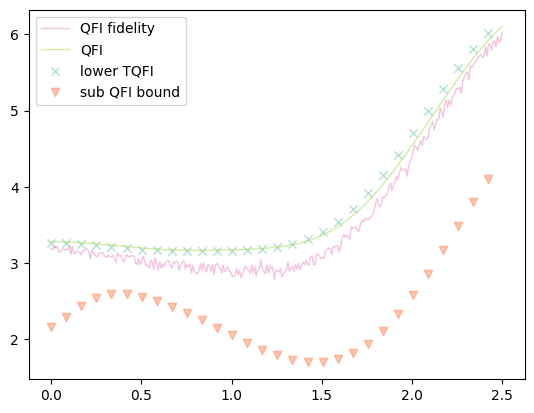

In [418]:
plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[3])
plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[4])

plt.scatter(x_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI", 
             alpha=0.5,marker="x", 
             linewidth=1, color=palette[0])

plt.scatter(x_s[sparse_indices], 
            sub_qfi_bound[sparse_indices], 
            label="sub QFI bound", 
            alpha=0.5, marker="v", linewidth=1, color= palette[1])

plt.legend()

In [419]:
all(sub_qfi_bound <= lower_tqfi)

True

True


Text(0.5, 1.0, 'Super QFI - TQFI')

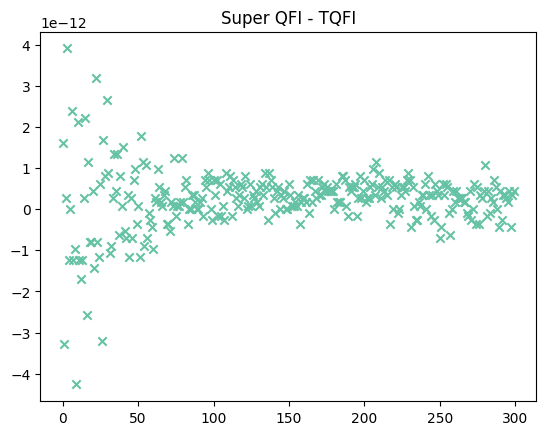

In [420]:
print(any(sub_qfi_bound <= lower_tqfi))
plt.scatter(x = list(range(len(lower_tqfi))), y = super_qfi_bound - upper_tqfi, marker="x")
plt.title("Super QFI - TQFI")

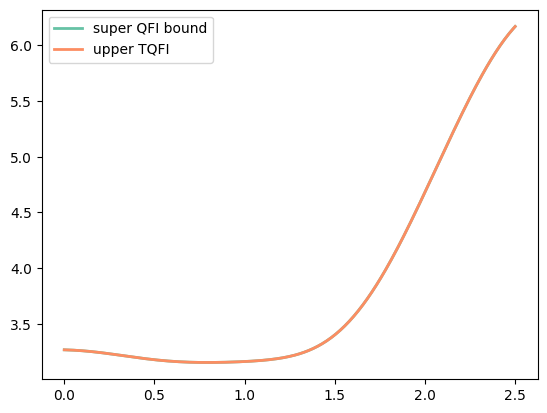

In [421]:
a = 0
b = len(x_s)
segment = range(a,b)
plt.plot(x_s[segment], 
            super_qfi_bound[segment], 
            label="super QFI bound", 
            alpha=1, linewidth=2, color= palette[0])
plt.plot(x_s[segment], 
            upper_tqfi[segment],
             label="upper TQFI", 
             alpha=1,
             linewidth=2, color=palette[1])
plt.legend()

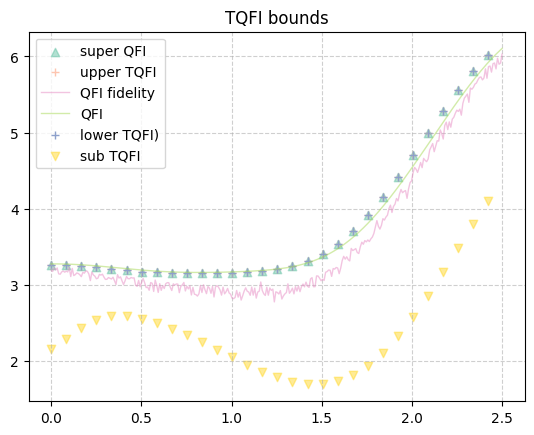

In [ ]:
plt.scatter(x_s[sparse_indices], 
            super_qfi_bound[sparse_indices], 
            label="super QFI", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.scatter(x_s[sparse_indices], 
            upper_tqfi[sparse_indices],
             label="upper TQFI", 
             alpha=0.5,marker="+", 
             linewidth=1, color=palette[1])

plt.plot(x_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[3])
plt.plot(x_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[4])

plt.scatter(x_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI)", 
             alpha=0.5,marker="+", 
             linewidth=1, color=palette[2])
 
plt.scatter(x_s[sparse_indices], 
            sub_qfi_bound[sparse_indices],
             label="sub TQFI", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[5])
             
plt.legend()
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability